## Aprendizaje no supervisado.

#### En los algoritmos que trabajan con aprendizaje no supervisado los datos no tienen etiquetas (o no se usan) y estos se clasifican a partir de su estructura interna (propiedades, características).

#### Uno de los algoritmos que usa aprendizaje no supervisado es Kmeans.

<font color='green'>
    
### Kmeans

 <font color='black'>

#### Este algoritmo agrupa objetos en k grupos basándose en sus características. El agrupamiento se basa en minimizar la suma de distancias entre cada objeto y el centroide de su grupo o cluster. 

#### El algoritmo Kmeans sigue los siguientes pasos:

1) <font color='orange'> INICIALIZAR: <font color='black'> Se establece el numero de grupos (k) y los k centroides (los centroides se pueden inicializar aleatoriamente)
    
2) <font color='orange'> ASIGNAR objetos a los centroides: <font color='black'>cada objeto de los datos es asignado a un centroide (el más cercano).
    
3) <font color='orange'> ACTUALIZAR centroides: <font color='black'> Se toma como nuevo centroide la posición del promedio de los objetos pertenecientes a dicho cluster. 
    
    
#### Los pasos 2 y 3 se repiten hasta que cada centroide no se mueva o se mueva por debajo de un umbral definido. 

#### El algoritmo Kmeans resulve un problema de optimización: la función que optimiza es la suma de las distancias cuadráticas de cada objeto al centroide de su cluster:

$$ min_s E(\mu _ i) = min_s \Sigma _{i=0} ^{k} \Sigma _{x_j \epsilon S_i} ||x_j - \mu _i ||^2 $$

S es el conjunto de grupos. 

#### Los objetos son vectores 


$$(x_1, ..., x_n)$$  

#### en donde cada elemento representa una caracteristica o atributo del objeto. 


#### * Es necesario decidir el valor de k. 
#### * El resultado final depende de la inicialización de los centroides. 

Se presenta un ejemplo de clasificación usando el algoritmo kmean. 
Se usa scikit-learn que es la librería de python de Machine Learning. 

#### Ejemplo 1

In [1]:
%matplotlib inline

# Permite realizar las gráficas dentro del mismo notebook

import numpy as np

# contiene funciones matematicas

import matplotlib.pyplot as plt

# Permite hacer graficas

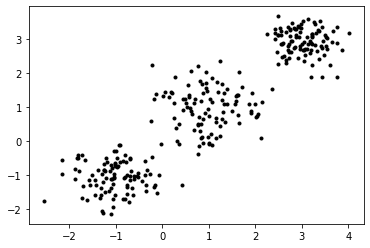

In [2]:
np.random.seed(7)

# se generan numeros pseudoaleatorios usando la semilla 7. 
# de esta manera los resultados son reproducibles.

x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5

# np.random.standard_normal((x, y)) ---> genera un arreglo de tamaño (x, y) con entradas pseudoaleatorias con 
# distribución normal 

# np.ones((x, y)) ---> genera un arreglo de tamaño (x, y), y sus entradas son todos 1. 

# Suponiendo que x = y = 2:

# np.random.standard_normal((2, 2)) = [[a    b] ,     np.ones((2, 2)) = [[1    1]
#                                     [c    d]]                         [1    1]]

# x1 = [a*0.6+1      b*0.6+1]
#      [c*0.6+1      d*0.6+1]

X = np.concatenate((x1,x2,x3),axis=0)

# junta en el eje 0 (mas interno) a los arreglos x1, x2, x3 en un solo arreglo:

# x = [[a    b],      y = [[e    f]  ----->   np.concatenate((x, y), axis = 0) = [[a    b]
#    v[c    d]]           [g    h]]                                               [c    d]
#                                                                                 [e    f]
#                                                                                 [g    h]]

plt.plot(X[:,0],X[:,1],'k.')

# X[:,0] ----> son todos los elementos (:) de la primera entrada (0): a, c, e, g

# X[:,1] ----> son todos los elementos (:) de la segunda entrada (1): b, d, f, h

# 'k.' ----> se grafica con puntos color negro

plt.show()

# muestra la gráfica

In [3]:
from sklearn.cluster import KMeans

# del modulo sklearn.cluster se permite el acceso a la funcion KMeans

In [4]:

k_means = KMeans(n_clusters=3)

# se define el numero de grupos como k = 3
# Se asocia al objeto k_means con el algoritmo KMeans definido en sklearn con tres grupos.

k_means.fit(X)

# Se entrena al algoritmo Kmeans con el conjunto de datos X definido anteriormente.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
centroides = k_means.cluster_centers_

# cluster_centers ---> genera a los tres centroides 

#print(centroides)

etiquetas = k_means.labels_

# labels_  ---> etiqueta a cada objeto de los datos, por tener tres grupos se tienen tres etiquetas: 0, 1 y 2 

# las etiquetas para cada punto indican a qué cluster pertenece dicho punto

# print(etiquetas)


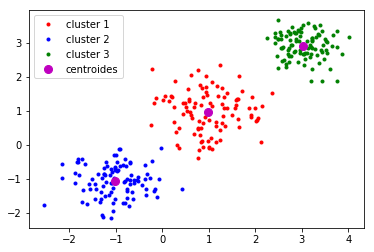

In [6]:
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'g.', label='cluster 3')

# se genera la grafica con diferente color para cada etiqueta. 

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

# se genera la grafica para los centroides

plt.legend(loc='best')
plt.show()

# se muestra la gráfica

#### Ejemplo 2: 

Clasificacion de imágenes que contienen un dígito. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# se importan las librerias a usar en python. 

In [7]:
from sklearn.cluster import KMeans

# se carga la libreria que contiene a las funciones del método k-means

In [8]:
from sklearn.datasets import load_digits

# la librería sklearn contiene conjuntos de datos

In [9]:
digits = load_digits()

data = digits.data

# se cargan los datos de la funcion load_digits()

In [10]:
print(data.shape)

# En el arreglo data, cada fila se corresponde con la imagen de un dígito. Los píxeles de la imagen rectangular de 8×8
# píxeles se han recolocado en una fila de 64 elementos. Por lo tanto, cada fila es un objeto o dato. 
# Las características o propiedades de cada objeto son las intensidades de gris de cada pixel. 

# Hay 1797 objetos (imágenes) y cada objeto tiene 64 características (intensidad de pixel).

(1797, 64)


In [11]:
data = 255-data

# se invierten los colores

In [12]:
np.random.seed(1)

# se fija la semilla 1 para obtener valores reproducibles

In [13]:
kmeans = KMeans(n_clusters=10,init='random')

# hay diez digitos, fijamos el numero de clusters como 10

kmeans.fit(data)

# se entrena el algoritmo

Z = kmeans.predict(data)

# se hace una prediccion para cada objeto. 
# Z es una lista en donde cada entrada contiene la prediccion realizada. 
# por ejemplo, si Z=[8 3 3 ...] indica que la prediccion del digito en la primera imagen es 8, en la 
# segunda imagen el digito es 3, etc. 

print(Z)

[3 9 9 ... 9 7 7]


cluster 0
182 elementos


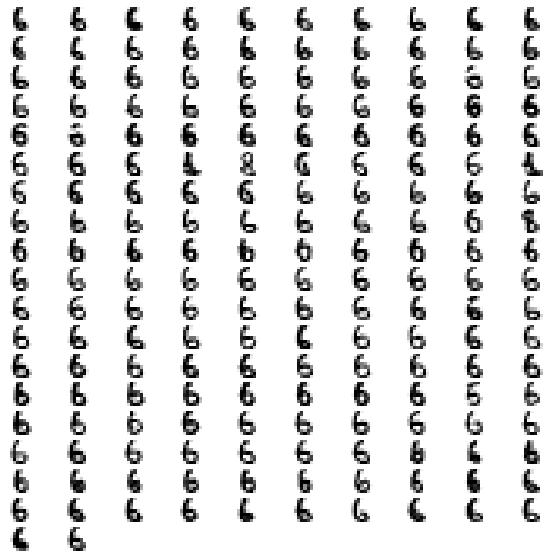

cluster 1
156 elementos


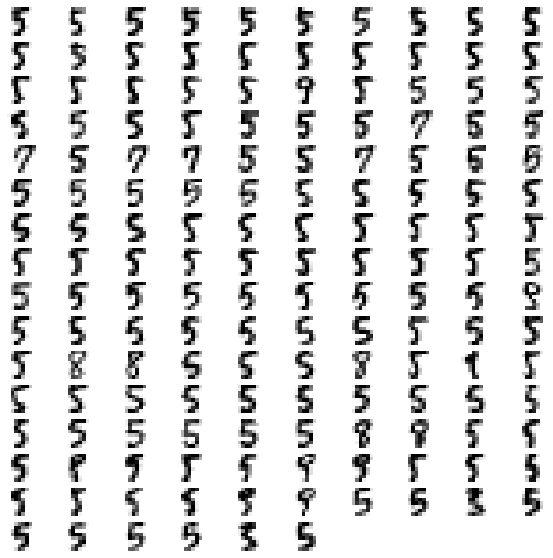

cluster 2
197 elementos


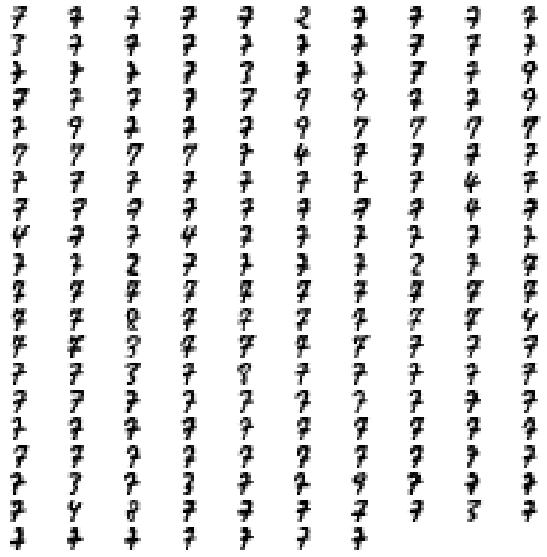

cluster 3
179 elementos


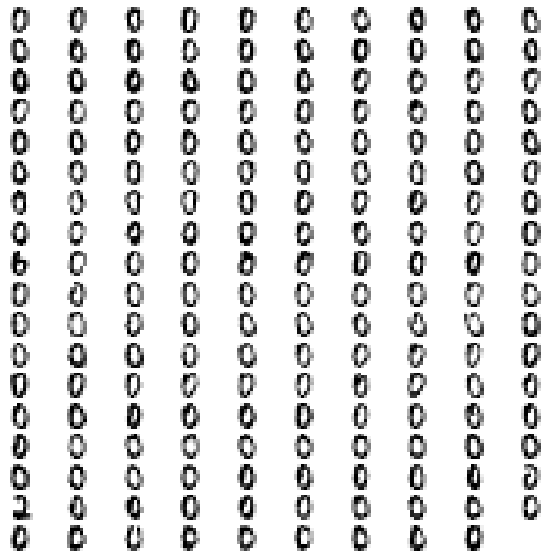

cluster 4
180 elementos


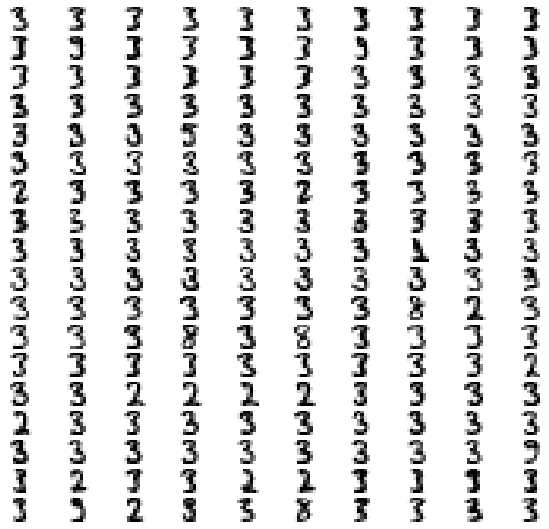

cluster 5
176 elementos


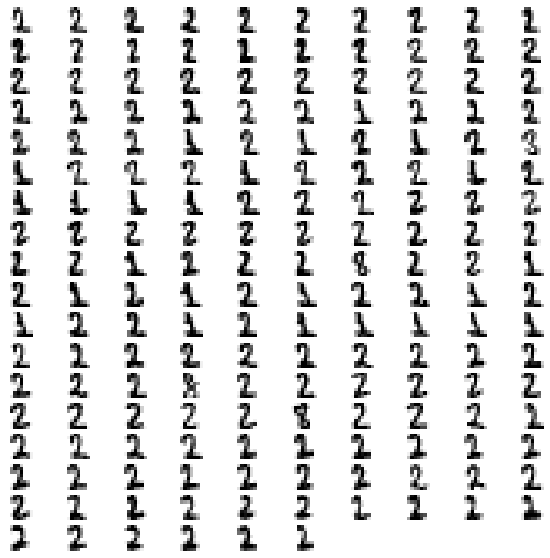

cluster 6
166 elementos


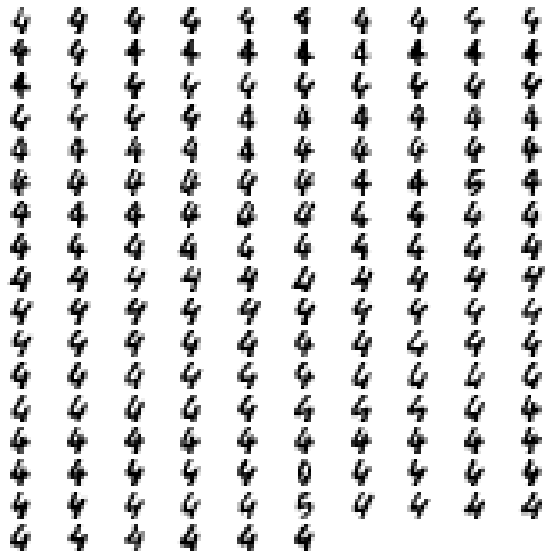

cluster 7
242 elementos


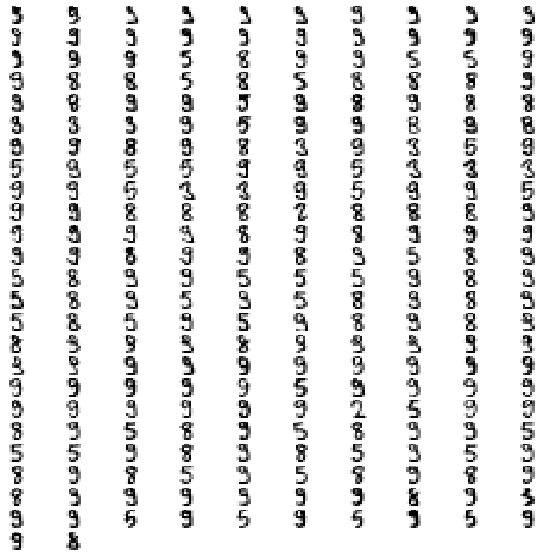

cluster 8
93 elementos


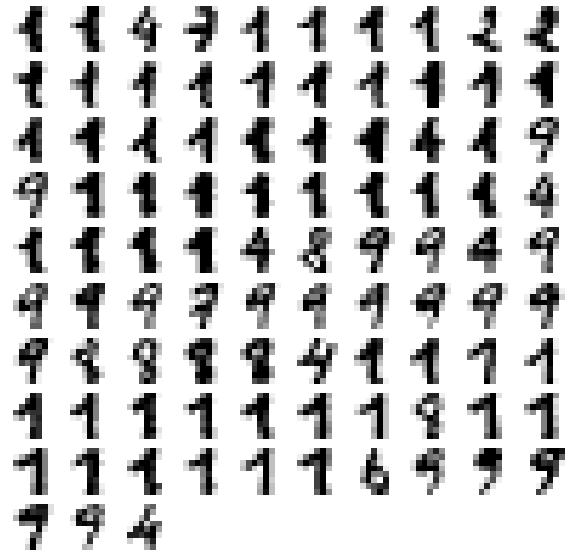

cluster 9
226 elementos


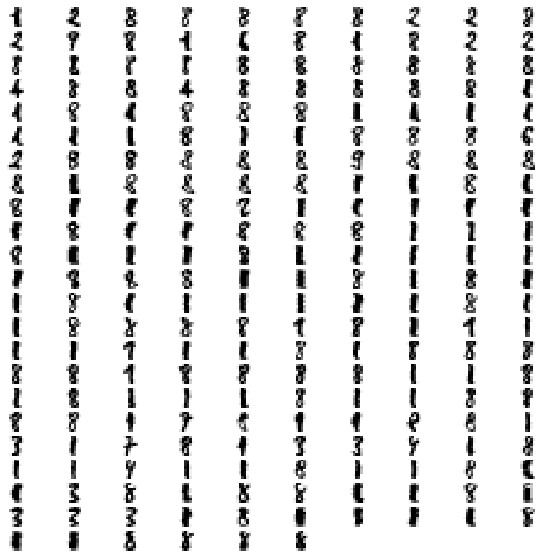

In [16]:
for i in range(0,10):  
    
    # i = 0, 1, 2, ..., 9

    fila = np.where(Z==i)[0] 
    
    # filas en Z donde están las imagenes de cada cluster
    
    num = fila.shape[0]      
    
    # numero imágenes de cada cluster
    # numero de imágenes que tienen al dígito i
    
    r = np.floor(num/10.)    
    
    # numero de filas menos 1 en figura de salida 

    print("cluster " + str(i))
    
    print(str(num) + " elementos")

    plt.figure(figsize = (10,10))
    
    # Las siguientes lineas de codigo son para mostrar una imagen a continuacion de otra. 
    
    for k in range(0, num):
        
        # k = 0, 1, 2, ..., num-1
        
        plt.subplot(r+1, 10, k+1)
        
        # subplot(nrows, ncols, index)
        
        imagen = data[fila[k], ]
        
        # se toma la imagen k
        
        imagen = imagen.reshape(8, 8)
        
        # se cambia el tamaño de la imagen k
        
        plt.imshow(imagen, cmap=plt.cm.gray)
        
        plt.axis('off')
        
        # no muestra los ejes
        
    plt.show()

Referencia:

https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html

In [17]:
print ("SuMBoDy")

SuMBoDy
